# Electric Vehicle Market of India(EV Market)

>The Indian Electric Vehicle Market size is expexted to grow from <b>USD 5.61 billion in 2023 to USD 37.68 by 2028</b>.

><b>EV currently occupy 2.4</b> percent Indian Market

# A.Buisness Context

<B>We want to build a model of the issue. So we may create a solution by utilising.</b>

Our main goal is to create a solid problem-solving model for the electric vehicle (EV) sector. By doing this, we hope to offer cutting-edge solutions that aid in the expansion and sustainability of the EV market.


    
<b>Model – Problem – Solutions</b>


# B.BUSINESS PROBLEM

In the Indian electric vehicle (EV) industry, our startup is having trouble overcoming a strategic obstacle.

As we choose which electric vehicle market category would be the most profitable to expand, 

we need to determine our target customer base. 

# C. Improvements to the Solution

<b>Consider these datasets for a firm looking to manufacture electric vehicles in India that is having trouble deciding which vehicle types and target market to target:</b>

<b>1. Market Research Data:</b> To understand consumer preferences and market trends.

<b>2. Customer Surveys:</b> To compile information on the demands and tastes of future customers.

<b>3. Demographic Data:</b> For dividing up the intended audience.

<b>4. Competitor Data:</b> To evaluate the market share, prices, and models of electric vehicles currently available.

<b>5. Regulatory Data:</b> Must keep aware of governmental incentives and policies.

<b>6. Energy Data:</b> To evaluate the accessibility of the infrastructure and energy sources for charging.

# <u>Step 1: DATA COLLECTION and DATA CLEANING</u>


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV

# <u>Let's start with first dataset "Vehicle Data"</u>

In [2]:
df = pd.read_csv("vehicle_data.csv")

In [3]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,max_sales_volume,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,ADAPTED VEHICLE,20 lakh,5,0.004419,Karnataka,136,223175
1,AGRICULTURAL TRACTOR,12 lakh,1,0.000884,Punjab,11,151491
2,BUS,30 lakh,233,0.205941,Maharashtra,317,202130
3,E-RICKSHAW(P),2 lakh,49885,44.091781,Uttar Pradesh,108,65431
4,E-RICKSHAW WITH CART (G),2 lakh,2658,2.349323,Uttar Pradesh,108,65431


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vehicle_Type                 24 non-null     object 
 1   Vehicle_Max_Price            24 non-null     object 
 2   max_sales_volume             24 non-null     int64  
 3   market_share                 24 non-null     float64
 4   State                        24 non-null     object 
 5   Public_EV_Charging_Stations  24 non-null     int64  
 6   Average_gross_income         24 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.4+ KB


In [5]:
df.describe()

,max_sales_volume,market_share,Public_EV_Charging_Stations,Average_gross_income
count,24.000000,24.000000,24.000000,24.000000
mean,4714.125000,4.166667,174.458333,196986.750000
std,12894.810319,11.397317,166.963932,77113.298069
min,1.000000,0.000884,4.000000,65431.000000
25%,2.750000,0.002431,27.000000,143984.000000
50%,63.500000,0.056126,136.000000,213396.000000
75%,2686.000000,2.374071,238.250000,223175.000000
max,49885.000000,44.091781,597.000000,376221.000000


<b><u>Checking Missing Values of Vehicle data</u></b>

In [6]:
df.isnull().sum()

Vehicle_Type                   0
Vehicle_Max_Price              0
max_sales_volume               0
market_share                   0
State                          0
Public_EV_Charging_Stations    0
Average_gross_income           0
dtype: int64

In [7]:
df.dtypes

Vehicle_Type                    object
Vehicle_Max_Price               object
max_sales_volume                 int64
market_share                   float64
State                           object
Public_EV_Charging_Stations      int64
Average_gross_income             int64
dtype: object

<b><u>Data Type Conversion</u></b>

In [8]:
df['Vehicle_Max_Price'] = df['Vehicle_Max_Price'].str.replace(',', '')  # Remove commas
df['Vehicle_Max_Price'] = df['Vehicle_Max_Price'].str.replace(' crore', 'e7')  # Replace " crore" with "e7"
df['Vehicle_Max_Price'] = df['Vehicle_Max_Price'].str.replace(' lakh', 'e5')   # Replace " lakh" with "e5"
df['Vehicle_Max_Price'] = df['Vehicle_Max_Price'].str.replace(' ', '')  # Remove spaces
df['Vehicle_Max_Price'] = df['Vehicle_Max_Price'].astype(float)  # Convert to float

In [9]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,max_sales_volume,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,ADAPTED VEHICLE,2000000.0,5,0.004419,Karnataka,136,223175
1,AGRICULTURAL TRACTOR,1200000.0,1,0.000884,Punjab,11,151491
2,BUS,3000000.0,233,0.205941,Maharashtra,317,202130
3,E-RICKSHAW(P),200000.0,49885,44.091781,Uttar Pradesh,108,65431
4,E-RICKSHAW WITH CART (G),200000.0,2658,2.349323,Uttar Pradesh,108,65431


<b><u>Handling Categorical Data</u></b>

In [10]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(df[label]):
        lst = df[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        df[label] = df[label].map(label_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vehicle_Type                 24 non-null     int64  
 1   Vehicle_Max_Price            24 non-null     float64
 2   max_sales_volume             24 non-null     int64  
 3   market_share                 24 non-null     float64
 4   State                        24 non-null     int64  
 5   Public_EV_Charging_Stations  24 non-null     int64  
 6   Average_gross_income         24 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.4 KB


<AxesSubplot:>

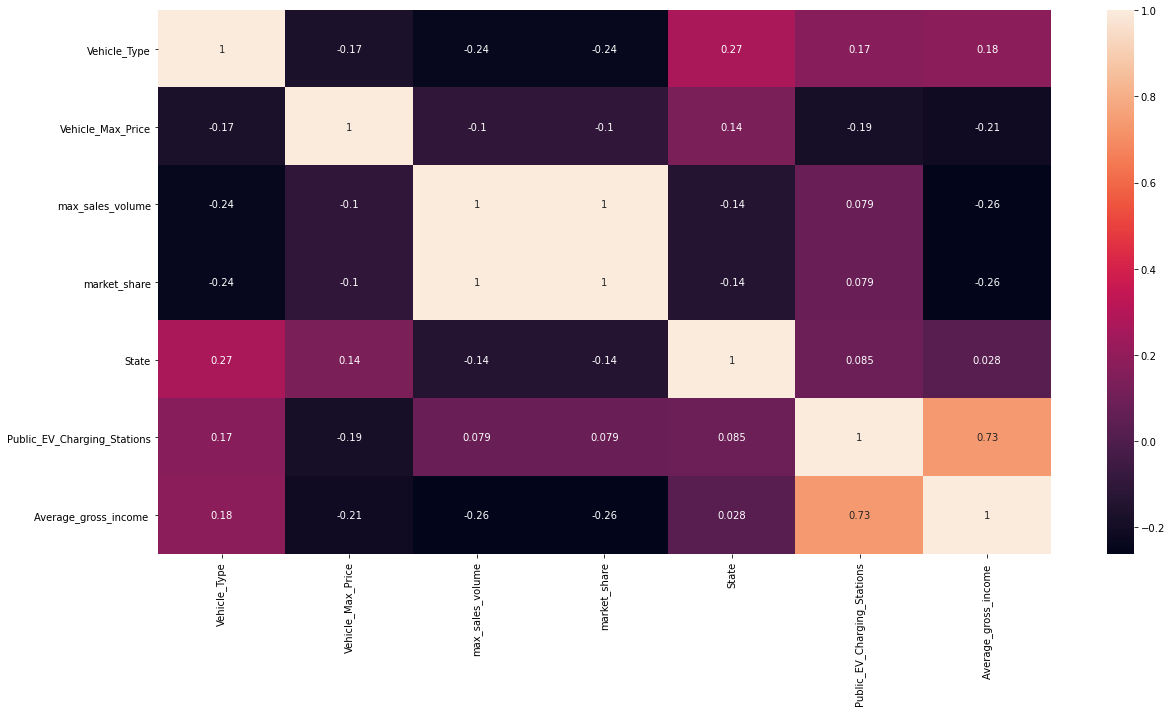

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [12]:
df.drop("max_sales_volume", axis=1, inplace=True)
df.head()

,Vehicle_Type,Vehicle_Max_Price,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,0,2000000.0,0.004419,0,136,223175
1,1,1200000.0,0.000884,1,11,151491
2,2,3000000.0,0.205941,2,317,202130
3,3,200000.0,44.091781,3,108,65431
4,4,200000.0,2.349323,3,108,65431


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vehicle_Type                 24 non-null     int64  
 1   Vehicle_Max_Price            24 non-null     float64
 2   market_share                 24 non-null     float64
 3   State                        24 non-null     int64  
 4   Public_EV_Charging_Stations  24 non-null     int64  
 5   Average_gross_income         24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


<b><u>So now we got our modified data</u></b>

In [14]:
df.to_csv("data1.csv",index = False)

In [15]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,0,2000000.0,0.004419,0,136,223175
1,1,1200000.0,0.000884,1,11,151491
2,2,3000000.0,0.205941,2,317,202130
3,3,200000.0,44.091781,3,108,65431
4,4,200000.0,2.349323,3,108,65431


# <u>Let's start with second dataset "Charging Station Data"</u>

In [16]:
df1 = pd.read_csv("charging_station_data.csv")

In [17]:
df1.head()

,no,region,address,charging_address,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                202 non-null    int64  
 1   region            202 non-null    object 
 2   address           202 non-null    object 
 3   charging_address  202 non-null    object 
 4   latitude          202 non-null    float64
 5   longitude         202 non-null    float64
 6   type              202 non-null    object 
 7   power             202 non-null    object 
 8   service           202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


# <u>Let's start with third dataset "People Data"</u>

In [87]:
df2 = pd.read_csv("people_data.csv")

In [88]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [90]:
df2.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


<B><U>Checking Missing values of Person Data</b></u>

In [23]:
df2.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [91]:
df2.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

<b><u>Data Type Conversion</u></b>

In [92]:
for label, content in df2.items():
    if not pd.api.types.is_numeric_dtype(df2[label]):
        lst = df2[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        df2[label] = df2[label].map(label_map)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Personal loan     99 non-null     int64
 6   House Loan        99 non-null     int64
 7   Wife Working      99 non-null     int64
 8   Salary            99 non-null     int64
 9   Wife Salary       99 non-null     int64
 10  Total Salary      99 non-null     int64
 11  Make              99 non-null     int64
 12  Price             99 non-null     int64
dtypes: int64(13)
memory usage: 10.2 KB


In [93]:
df2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,800000,0,800000,0,800000
1,35,0,1,0,2,0,1,1,1400000,600000,2000000,1,1000000
2,45,1,1,1,4,0,1,0,1800000,0,1800000,2,1200000
3,41,1,1,0,3,1,0,1,1600000,600000,2200000,3,1200000
4,31,0,1,0,2,0,0,1,1800000,800000,2600000,4,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,1,0,1,0,1,0,0,2400000,0,2400000,4,1600000
95,50,0,1,0,3,1,0,1,3800000,1300000,5100000,4,1600000
96,51,1,1,1,2,0,1,0,2200000,0,2200000,1,1100000
97,51,0,1,0,2,1,0,1,2700000,1300000,4000000,8,1500000


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Personal loan     99 non-null     int64
 6   House Loan        99 non-null     int64
 7   Wife Working      99 non-null     int64
 8   Salary            99 non-null     int64
 9   Wife Salary       99 non-null     int64
 10  Total Salary      99 non-null     int64
 11  Make              99 non-null     int64
 12  Price             99 non-null     int64
dtypes: int64(13)
memory usage: 10.2 KB


In [95]:
df2.to_csv("data2_csv",index = False)

In [96]:
df2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,800000,0,800000,0,800000
1,35,0,1,0,2,0,1,1,1400000,600000,2000000,1,1000000
2,45,1,1,1,4,0,1,0,1800000,0,1800000,2,1200000
3,41,1,1,0,3,1,0,1,1600000,600000,2200000,3,1200000
4,31,0,1,0,2,0,0,1,1800000,800000,2600000,4,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,1,0,1,0,1,0,0,2400000,0,2400000,4,1600000
95,50,0,1,0,3,1,0,1,3800000,1300000,5100000,4,1600000
96,51,1,1,1,2,0,1,0,2200000,0,2200000,1,1100000
97,51,0,1,0,2,1,0,1,2700000,1300000,4000000,8,1500000


<B><U> So,our Data Cleaning and Data Extraction are done</b></u>

# <B><U>Step 2: DATA Visualization By Using EDA</u><b>

# <b><u>Exploratory Data Analysis (EDA)</u></b>

<b>We gonna do two types of analysis</b>

<B>1.] Univariate.</b>

<b>2.] Bivariate.</b>

# <i> Let's see first 'Univariate Analysis'</i>:
<b>1. Histogram</b>

<b>2. PDF</b>

<b>3. Box Plot</b>

<b>4. Violin Plot</b>

# <center><u>EDA OF "VEHICLE DATA"</u></center>

<b>We Are Going To See Numerical Features Of EDA:</b>

In [30]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,0,2000000.0,0.004419,0,136,223175
1,1,1200000.0,0.000884,1,11,151491
2,2,3000000.0,0.205941,2,317,202130
3,3,200000.0,44.091781,3,108,65431
4,4,200000.0,2.349323,3,108,65431


# <i><b>EDA Analysis Of 'Vehicle_Max_Price' Feature</B></i>

><b>Histogram Of 'Vehicle_Max_Price' Feature</b>

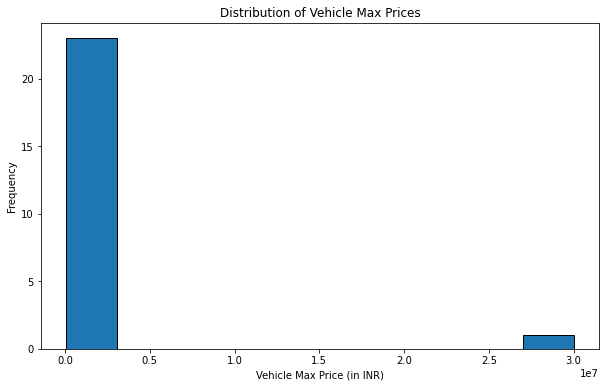

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['Vehicle_Max_Price'], bins=10, edgecolor='k')
plt.xlabel('Vehicle Max Price (in INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Max Prices')
plt.show()

><B>PDF of 'Vehicle_Max_Price' Feature</B>

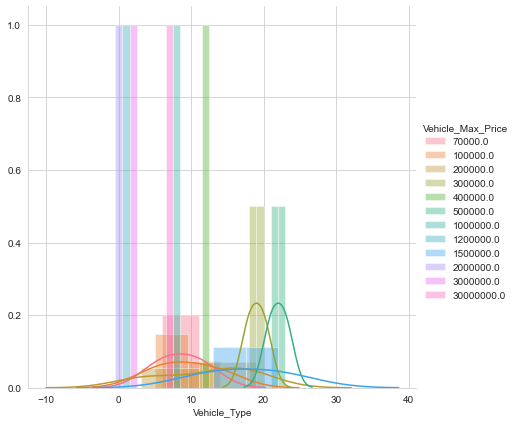

In [32]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Vehicle_Max_Price", size=6) \
   .map(sns.distplot, "Vehicle_Type")\
   .add_legend();
plt.show();

><B>Barplot of 'Vehicle_Max_Price' Feature</b>

<AxesSubplot:xlabel='Vehicle_Type', ylabel='Vehicle_Max_Price'>

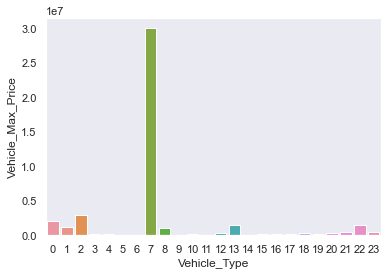

In [33]:
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data = df,x="Vehicle_Type", y="Vehicle_Max_Price")

# <i> EDA Analysis Of 'market_share' Feature</i>

><b>Histogram of 'market_share' Feature</b>

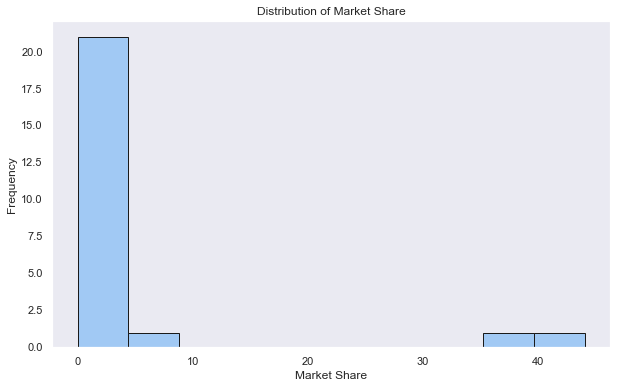

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['market_share'], bins=10, edgecolor='k')
plt.xlabel('Market Share')
plt.ylabel('Frequency')
plt.title('Distribution of Market Share')
plt.show()

><b>PDF of 'market_share' feature</b>

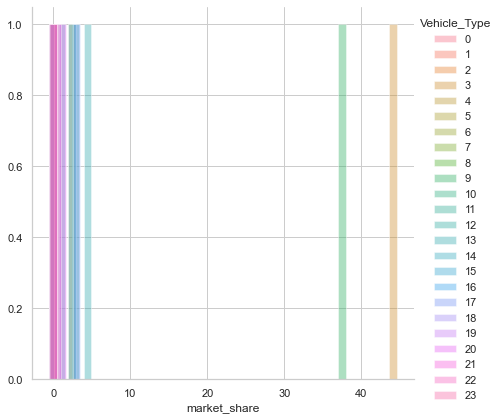

In [35]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Vehicle_Type", size=6) \
   .map(sns.distplot, "market_share")\
   .add_legend();
plt.show();

><b>Barplot of 'market_share' Feature</b>

<AxesSubplot:xlabel='Vehicle_Type', ylabel='market_share'>

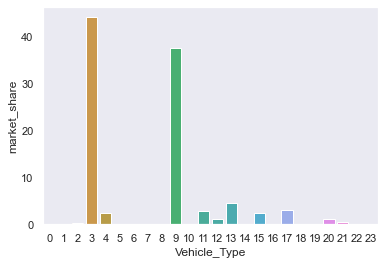

In [36]:
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data = df,x="Vehicle_Type", y="market_share")

# <i> EDA Analysis Of 'Public_EV_Charging_Stations' Feature</i>

><b> Histogram of 'Public_EV_Charging_Stations' Feature</b>

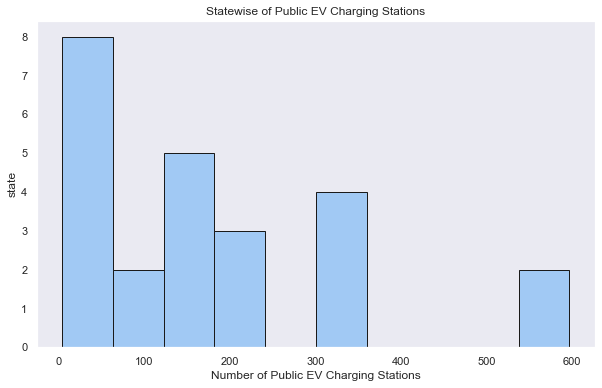

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df['Public_EV_Charging_Stations'], bins=10, edgecolor='k')
plt.xlabel('Number of Public EV Charging Stations')
plt.ylabel('state')
plt.title('Statewise of Public EV Charging Stations')
plt.show()

><b>Barplot of 'Public_EV_Charging_Stations' Feature</b>

<AxesSubplot:xlabel='State', ylabel='Public_EV_Charging_Stations'>

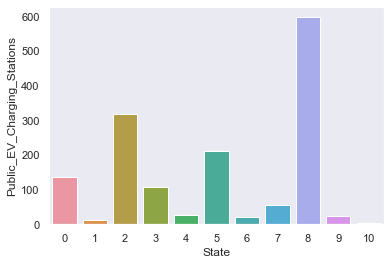

In [38]:
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data = df,x="State", y="Public_EV_Charging_Stations")

# <i>EDA Analysis Of 'State' Feature</i>

><b>Bar Chart of 'State' Feature</b>

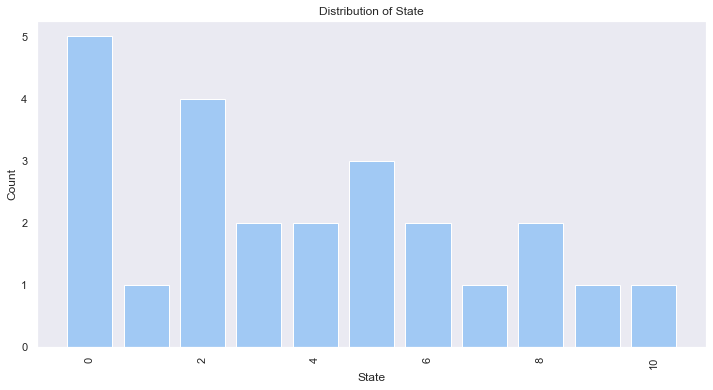

In [39]:
state_counts = df['State'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.show()

# <i>EDA Analysis Of 'Average_gross_income' Feature</i>

><b>Bar Plot of "Average_gross_income" Feature</b>

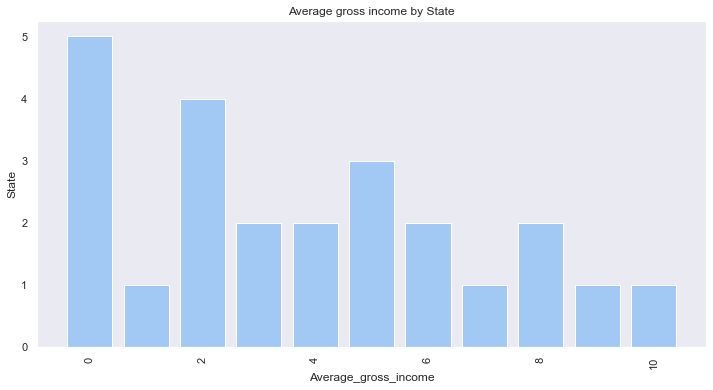

In [40]:
state_counts = df['State'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Average_gross_income')
plt.ylabel('State')
plt.title('Average gross income by State')
plt.show()

# <I>Let's see the second one 'Bivariate Analysis':</I>
<b>1. Scatter Plot</B>

<b>2. Pair Plot</B>

<b>3. Join Plot</B>

# <i>EDA Analysis of 'Market Share' Vs 'Vehicle Max Price'</i>

><B> Scatter plot of 'Market Share' Vs 'Vehicle Max Price'</B>

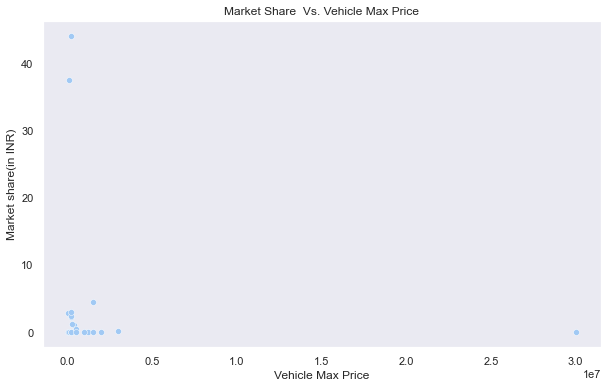

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle_Max_Price',y='market_share', data=df)
plt.xlabel('Vehicle Max Price')
plt.ylabel('Market share(in INR)')
plt.title('Market Share  Vs. Vehicle Max Price')
plt.show()

# <i>EDA Analysis of "Vehicle Type Vs. Market Share"</i>

><b> Joint Plot of "Vehicle Type Vs. Market Share"</b>

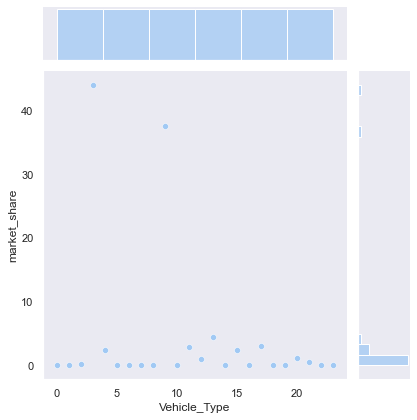

In [42]:
sns.jointplot(data = df, x="Vehicle_Type", y="market_share")

# <i>EDA Analysis of "State Vs. Public EV Charging Stations"</i>

><b>Join Plot of "State Vs. Public EV Charging Stations"</B>

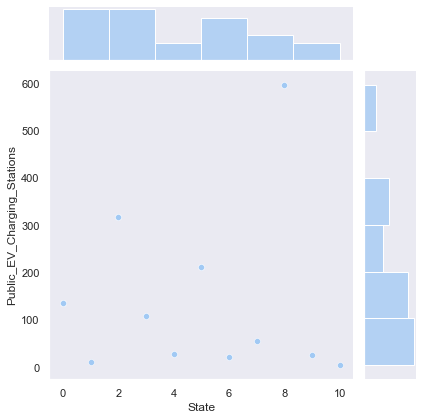

In [43]:
sns.jointplot(data = df, x="State", y="Public_EV_Charging_Stations")

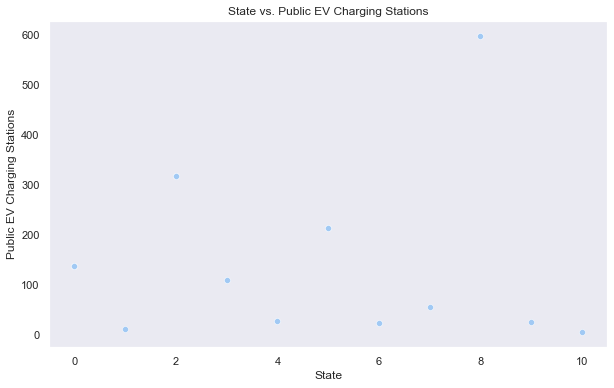

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State',y='Public_EV_Charging_Stations', data=df)
plt.xlabel('State')
plt.ylabel('Public EV Charging Stations')
plt.title('State vs. Public EV Charging Stations')
plt.show()

<b>Here ,Our EDA Analysis of Vehicle Data is completed and We got know that, we have to normalised or Scaling the Features</b>

# Scaling of Numerical features

<b>We will do scaling of numerical features, Means To, Normalise the features.</b>

In [45]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,0,2000000.0,0.004419,0,136,223175
1,1,1200000.0,0.000884,1,11,151491
2,2,3000000.0,0.205941,2,317,202130
3,3,200000.0,44.091781,3,108,65431
4,4,200000.0,2.349323,3,108,65431


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
Vmp= scaling.fit_transform(df[['Vehicle_Max_Price']])
Ms = scaling.fit_transform(df[['market_share']])
PEV= scaling.fit_transform(df[['Public_EV_Charging_Stations']])

df['Vehicle_Max_Price'] = Vmp

df['market_share'] = Ms

df['Public_EV_Charging_Stations'] = PEV


In [47]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,0,0.064484,0.000080,0,0.222597,223175
1,1,0.037755,0.000000,1,0.011804,151491
2,2,0.097895,0.004651,2,0.527825,202130
3,3,0.004343,1.000000,3,0.175379,65431
4,4,0.004343,0.053264,3,0.175379,65431


# Mean , Median and Percentile

In [48]:
# Calculate mean, median, and percentiles for the scaled features

mean_values = df[['Vehicle_Max_Price', 'market_share', 'Public_EV_Charging_Stations']].mean()
median_values = df[['Vehicle_Max_Price', 'market_share', 'Public_EV_Charging_Stations']].median()
percentiles = df[['Vehicle_Max_Price', 'market_share', 'Public_EV_Charging_Stations']].quantile([0.25, 0.50, 0.75])

print("Mean Values for Scaled Features:\n", mean_values)
print("\nMedian Values for Scaled Features:\n", median_values)
print("\nPercentiles for Scaled Features:\n", percentiles)


Mean Values for Scaled Features:
 Vehicle_Max_Price              0.058971
market_share                   0.094482
Public_EV_Charging_Stations    0.287451
dtype: float64

Median Values for Scaled Features:
 Vehicle_Max_Price              0.006014
market_share                   0.001253
Public_EV_Charging_Stations    0.222597
dtype: float64

Percentiles for Scaled Features:
       Vehicle_Max_Price  market_share  Public_EV_Charging_Stations
0.25           0.004343      0.000035                     0.038786
0.50           0.006014      0.001253                     0.222597
0.75           0.032743      0.053825                     0.395025


<B><U>So , Here our EDA and Normalization of "Vehicle Data" are completed and We are moving to next Data Set.</U></b>

<B>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</B>

# <center><u>EDA OF "CHARGING DATA"</U></center>

In [49]:
df1.head()

,no,region,address,charging_address,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


<b>Handling of Categorical Data</b>

In [50]:
for label, content in df1.items():
    if not pd.api.types.is_numeric_dtype(df1[label]):
        lst = df1[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        df1[label] = df1[label].map(label_map)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                202 non-null    int64  
 1   region            202 non-null    int64  
 2   address           202 non-null    int64  
 3   charging_address  202 non-null    int64  
 4   latitude          202 non-null    float64
 5   longitude         202 non-null    float64
 6   type              202 non-null    int64  
 7   power             202 non-null    int64  
 8   service           202 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 14.3 KB


<AxesSubplot:>

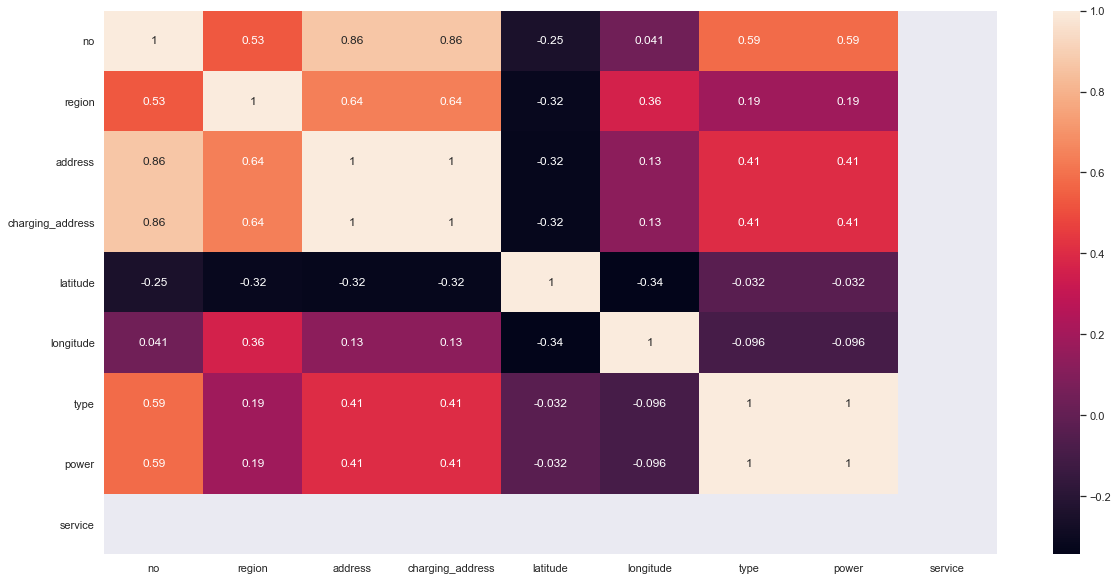

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True)

In [52]:
df1.to_csv("data1_csv",index = False)
df1

,no,region,address,charging_address,latitude,longitude,type,power,service
0,1,0,0,0,28.600725,77.226252,0,0,0
1,2,0,0,0,28.600725,77.226252,0,0,0
2,3,0,1,1,28.588303,77.217697,0,0,0
3,4,0,2,2,28.582654,77.220087,0,0,0
4,5,0,3,3,28.584485,77.220316,0,0,0
...,...,...,...,...,...,...,...,...,...
197,198,7,119,119,8.491622,76.956247,2,2,0
198,199,7,131,131,8.481051,76.912622,0,0,0
199,200,7,118,118,9.976921,76.277781,0,0,0
200,201,7,119,119,8.491622,76.956247,0,0,0


# <i> EDA Of "Region" Feature</i>

><b> Histogram of "Region" Feature</b>

(array([74., 16.,  2.,  0., 53., 31.,  0., 16.,  4.,  6.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

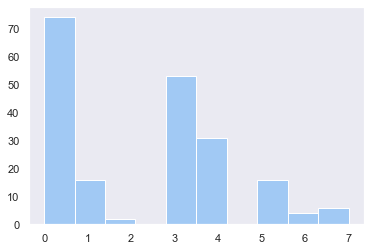

In [53]:
plt.hist(df1["region"])

<b> Observation :</b>

<u> From above graphical representation, we got know that the<b> highest region in between 0 to 1 and lowest in between 6 to 7 .</u></b>
    

><b>Kde plot  and Rug plot of "Region"Feature</b>

<AxesSubplot:xlabel='region', ylabel='Density'>

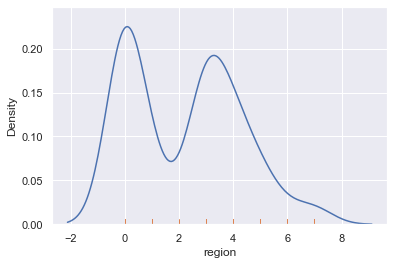

In [54]:
import seaborn as sns; sns.set_theme()
sns.kdeplot(data=df1, x="region")
sns.rugplot(data=df1, x="region")

<b> Observation :</b>

<u> From above graphical representation, we got know that the<b> highest peak of region is in between 0  and lowest  is in between 6 to 8 .</u></b>
    

# <i> EDA Of "Charging Address" ,"latitude","longitude","Power" and "Service" Feature </i>

><b>Histogram of "Charging Address"</b>

(array([18., 20., 20., 27., 23., 21., 14., 20., 13., 26.]),
 array([  0. ,  13.1,  26.2,  39.3,  52.4,  65.5,  78.6,  91.7, 104.8,
        117.9, 131. ]),
 <BarContainer object of 10 artists>)

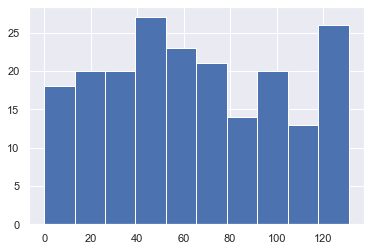

In [55]:
plt.hist(df1["charging_address"])

<b> Observation :</b>

<u> From above graphical representation, we got know that the<b> most of the charging address or same address is in between 40 to 60 and other highest is in 120 and lowest one in between 100 to 119 .</u></b>
    

><b>Kde plot  and Rug plot of "Region"Feature</b>

<AxesSubplot:xlabel='charging_address', ylabel='Density'>

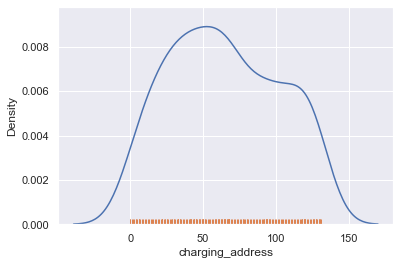

In [56]:
import seaborn as sns; sns.set_theme()
sns.kdeplot(data=df1, x="charging_address")
sns.rugplot(data=df1, x="charging_address")

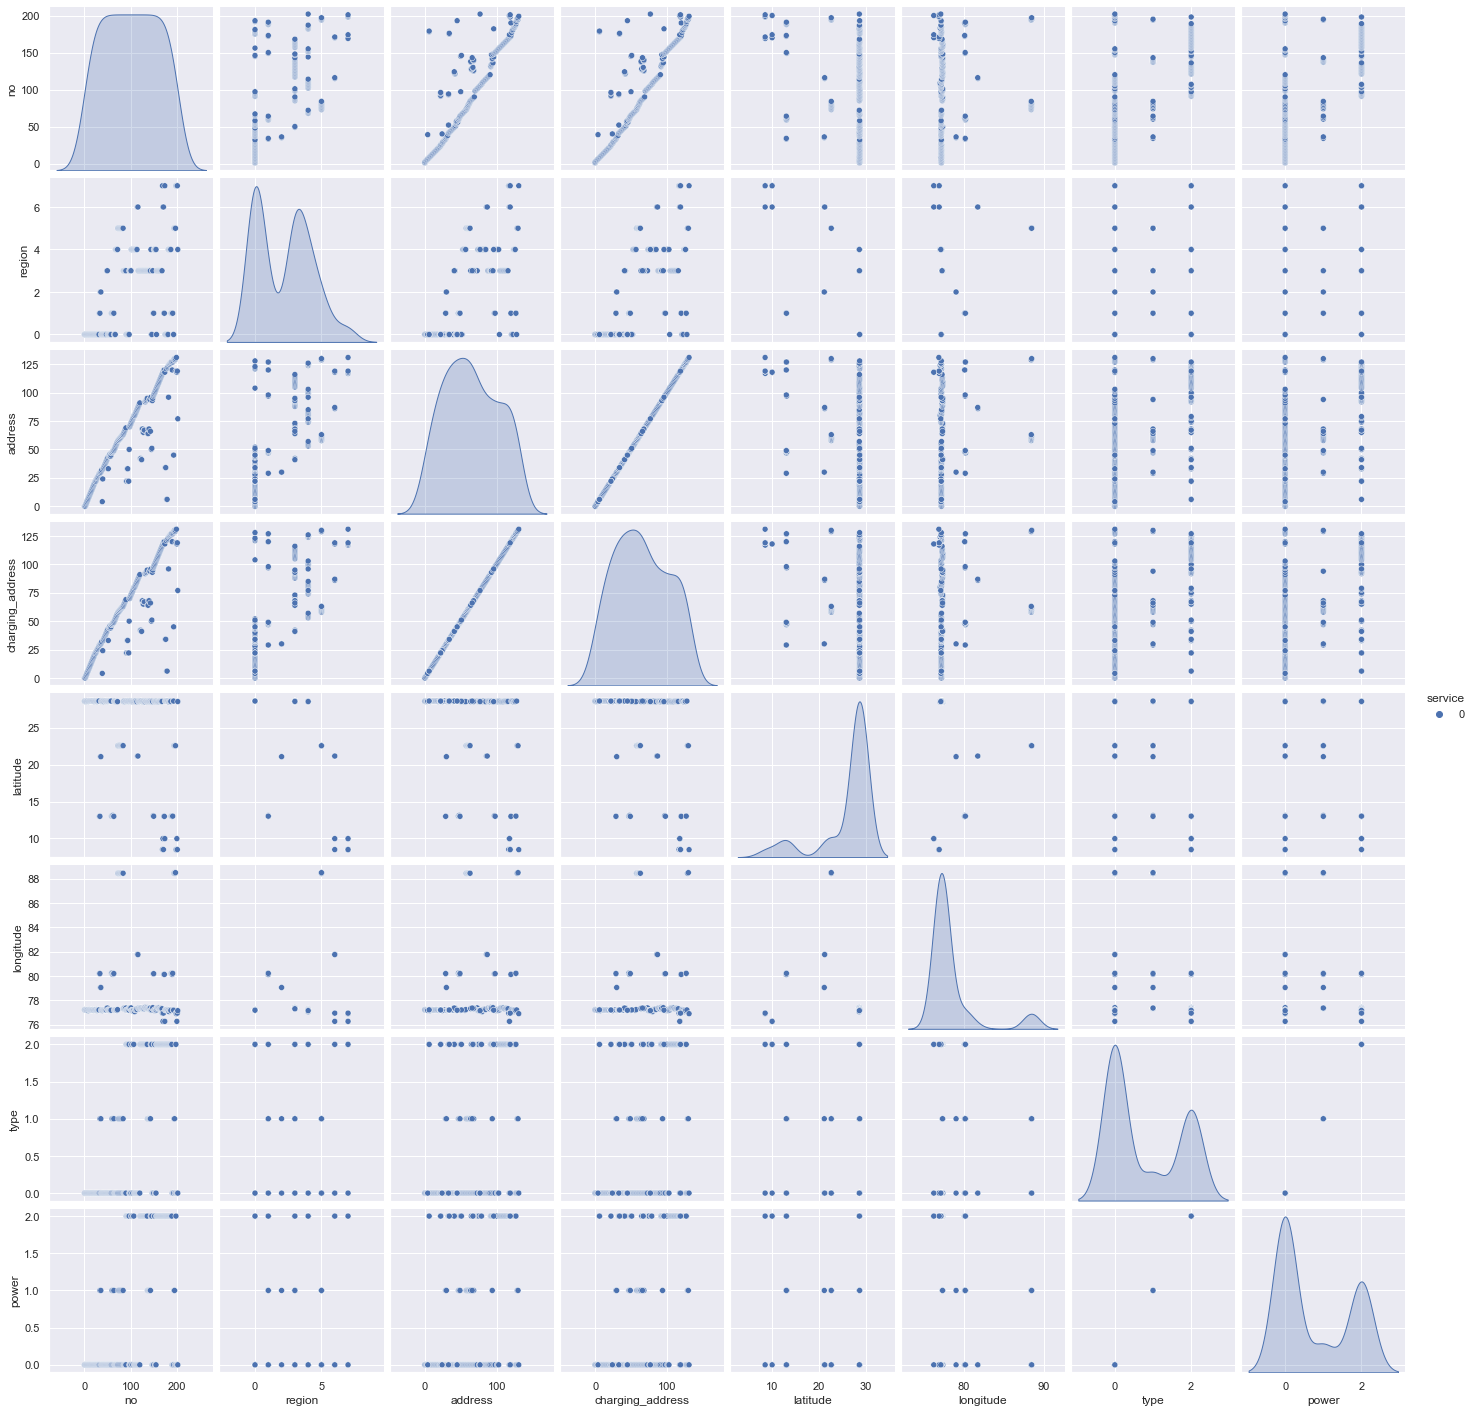

In [57]:
sns.pairplot(df1,hue='service')

><b>Join Plot of "Charging Address" Vs. "Longitude"</b>

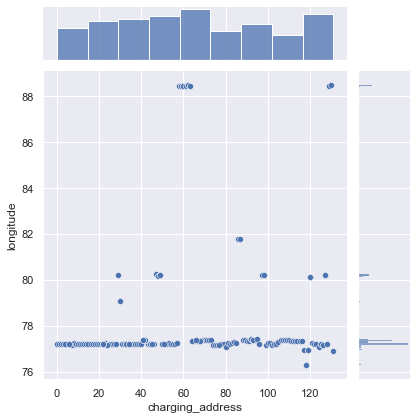

In [58]:
sns.jointplot(data = df1, x="charging_address", y="longitude")

<b> Observation :</b>

<u> From above graphical representation, we got know that the<b> as a Charging Address in longitude , the most highest peak is in between 76 to 78 and the most lowest peak at 88 and according to longitude in charging address the most of the charging address is in 60 point and secong highest in 120 and the lowest is in between 100 to 119.  .</u></b>
    

# Scaling of Numerical features
<b>We will do scaling of numerical features, means Normalise the features.</b>

In [59]:
df1.head()

,no,region,address,charging_address,latitude,longitude,type,power,service
0,1,0,0,0,28.600725,77.226252,0,0,0
1,2,0,0,0,28.600725,77.226252,0,0,0
2,3,0,1,1,28.588303,77.217697,0,0,0
3,4,0,2,2,28.582654,77.220087,0,0,0
4,5,0,3,3,28.584485,77.220316,0,0,0


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
la= scaling.fit_transform(df1[['latitude']])
lo = scaling.fit_transform(df1[['longitude']])

df1['latitude'] = la

df1['longitude'] = lo


In [61]:
df1.head()

,no,region,address,charging_address,latitude,longitude,type,power,service
0,1,0,0,0,0.997909,0.077545,0,0,0
1,2,0,0,0,0.997909,0.077545,0,0,0
2,3,0,1,1,0.997292,0.076845,0,0,0
3,4,0,2,2,0.997012,0.077041,0,0,0
4,5,0,3,3,0.997103,0.077059,0,0,0


<b> Observation :</b>

<U> From above the table, we can see that the <b>normalization in "Latitude" and in "longitude" feature</b></u>

# Mean , Median and Percentile

In [62]:
# Calculate mean, median, and percentiles for the scaled features

mean_values = df1[['region', 'charging_address', 'latitude','longitude','power','service']].mean()
median_values = df1[['region', 'charging_address', 'latitude','longitude','power','service']].median()
percentiles = df1[['region', 'charging_address', 'latitude','longitude','power','service']].quantile([0.25, 0.50, 0.75])

print("Mean Values for Scaled Features:\n", mean_values)
print("\nMedian Values for Scaled Features:\n", median_values)
print("\nPercentiles for Scaled Features:\n", percentiles)


Mean Values for Scaled Features:
 region               2.222772
charging_address    64.707921
latitude             0.866981
longitude            0.174979
power                0.762376
service              0.000000
dtype: float64

Median Values for Scaled Features:
 region               3.000000
charging_address    63.000000
latitude             0.996895
longitude            0.077545
power                0.000000
service              0.000000
dtype: float64

Percentiles for Scaled Features:
       region  charging_address  latitude  longitude  power  service
0.25     0.0             34.00  0.994674   0.076461    0.0      0.0
0.50     3.0             63.00  0.996895   0.077545    0.0      0.0
0.75     4.0             94.75  0.998755   0.089724    2.0      0.0


<B><u>So, Here our EDA analysis and Normalization of our "Charging Dataset" are done , Now we are moving to next Data set .</u></b>

# <center><u>EDA OF "PEOPLE DATASET"</u></center>

In [63]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,800000,0,800000,0,800000
1,35,0,1,0,2,0,1,1,1400000,600000,2000000,1,1000000
2,45,1,1,1,4,0,1,0,1800000,0,1800000,2,1200000
3,41,1,1,0,3,1,0,1,1600000,600000,2200000,3,1200000
4,31,0,1,0,2,0,0,1,1800000,800000,2600000,4,1600000


# <i>EDA Of "All" Feature</i>

><b>Histogram of "Age" Feature</b>

(array([10.,  9., 12., 17., 19.,  4., 14.,  6.,  1.,  7.]),
 array([26. , 28.5, 31. , 33.5, 36. , 38.5, 41. , 43.5, 46. , 48.5, 51. ]),
 <BarContainer object of 10 artists>)

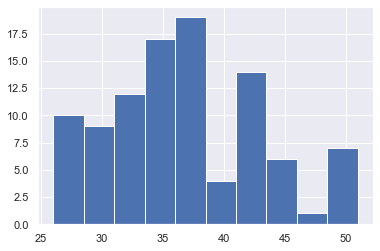

In [64]:
plt.hist(df2["Age"])

<b>Observation:</b>
    
<u>From above Graphical Represenation, We can see that the most of<b> the people is from some age group and that age group is in between 35 to 38</b>, and<b> the lowest age group fall in between 45 to 50.</b></u>

><b>Pair plot of All Feature</b>

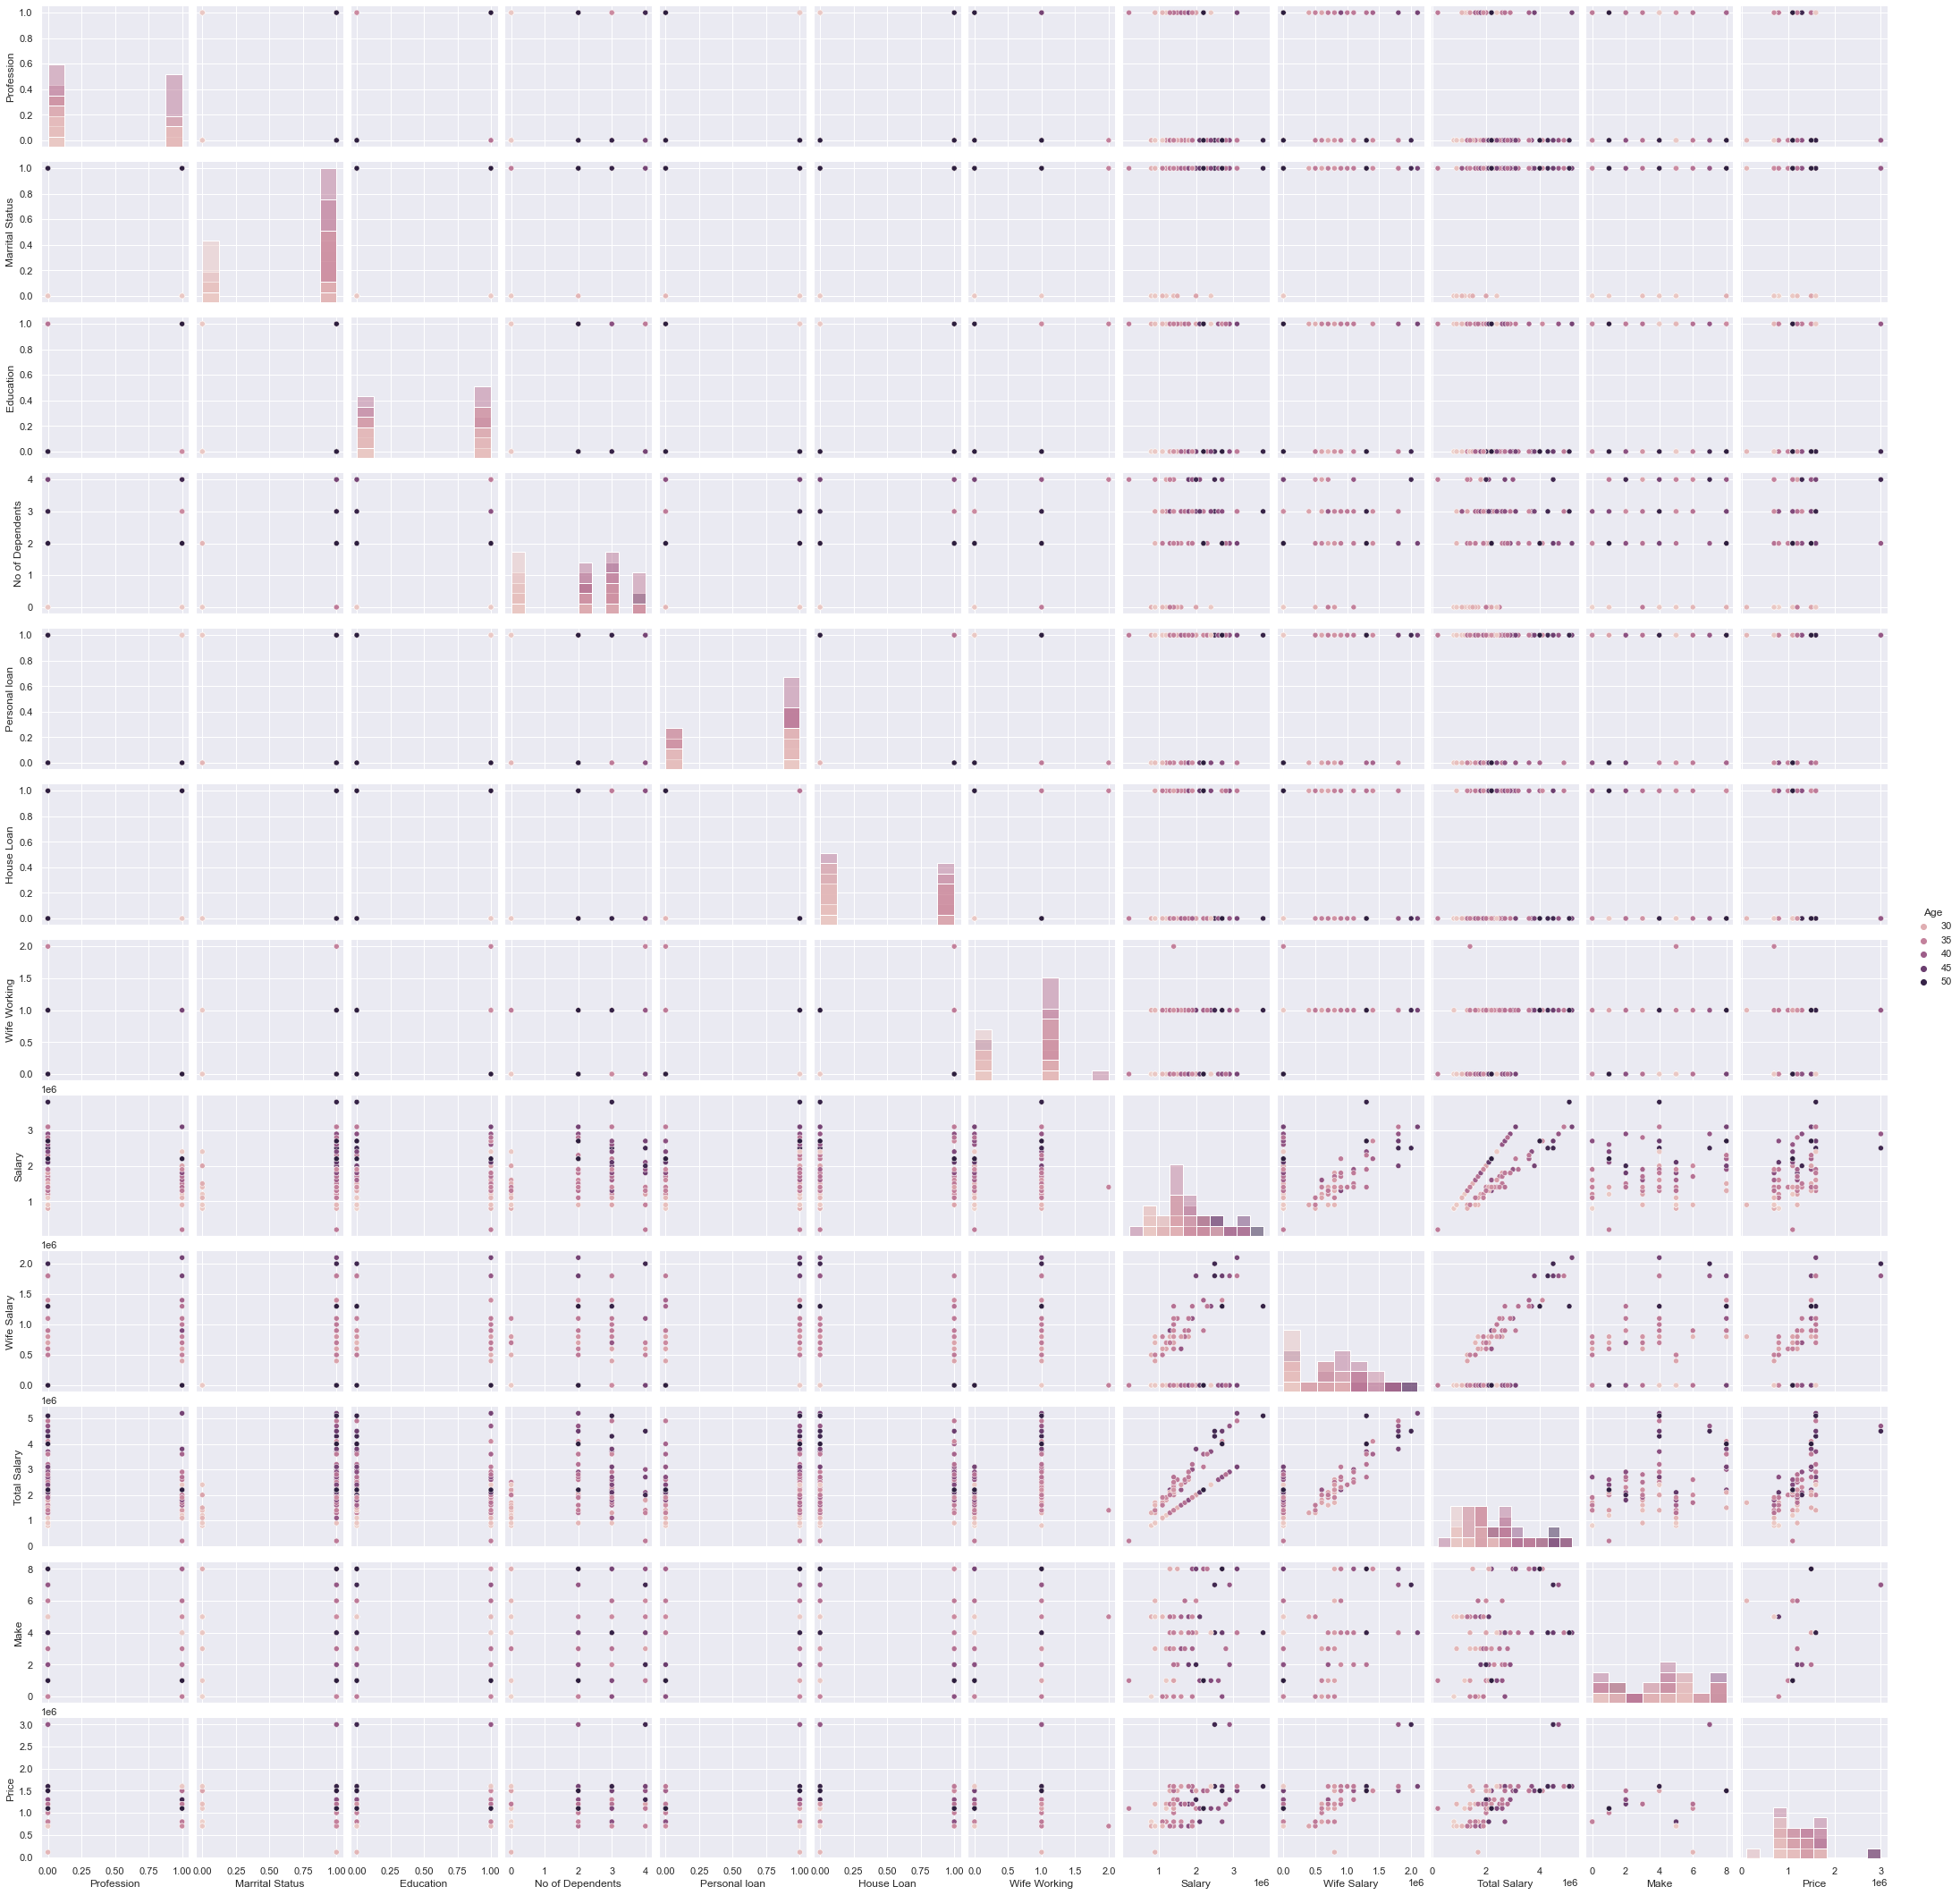

In [66]:
sns.pairplot(df2, hue="Age", diag_kind="hist")

><b>Scatter Plot of "Profession" Feature</b>

<AxesSubplot:xlabel='Marrital Status', ylabel='Age'>

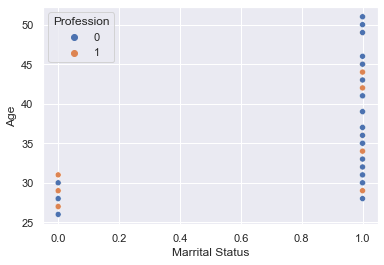

In [73]:
sns.scatterplot(data=df2, x="Marrital Status", y="Age",hue = 'Profession')

<b>Observation:</b>
    
<u>From above Graphical Represenation, you can see that the most people who are married <b>, people between age 30 to 50 </b></u>

<AxesSubplot:>

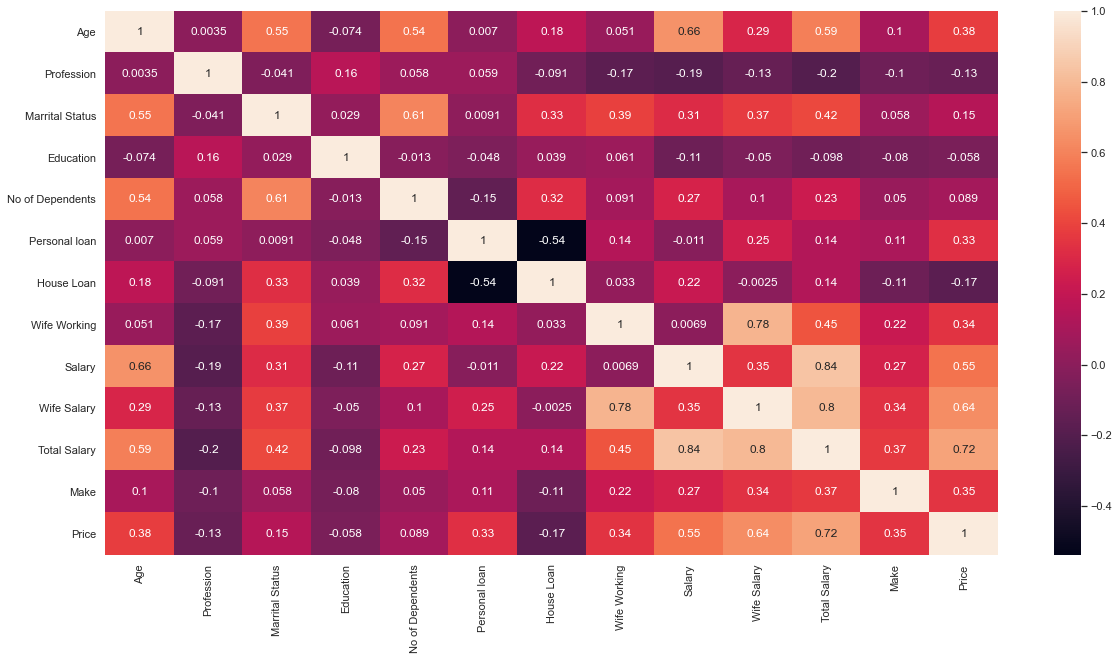

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot=True)

# Scaling of Numerical features
<b>We will do scaling of numerical features, means Normalise the features.</b>

In [98]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,800000,0,800000,0,800000
1,35,0,1,0,2,0,1,1,1400000,600000,2000000,1,1000000
2,45,1,1,1,4,0,1,0,1800000,0,1800000,2,1200000
3,41,1,1,0,3,1,0,1,1600000,600000,2200000,3,1200000
4,31,0,1,0,2,0,0,1,1800000,800000,2600000,4,1600000


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

Sal = scaling.fit_transform(df2[['Salary']])
Ws = scaling.fit_transform(df2[['Wife Salary']])
Ts = scaling.fit_transform(df2[['Total Salary']])
Prc = scaling.fit_transform(df2[['Price']])

df2['Salary'] = Sal
df2['Wife Salary'] = Ws
df2['Total Salary'] = Ts
df2['Price'] = Prc

In [100]:
df2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,0.166667,0.000000,0.12,0,0.238754
1,35,0,1,0,2,0,1,1,0.333333,0.285714,0.36,1,0.307958
2,45,1,1,1,4,0,1,0,0.444444,0.000000,0.32,2,0.377163
3,41,1,1,0,3,1,0,1,0.388889,0.285714,0.40,3,0.377163
4,31,0,1,0,2,0,0,1,0.444444,0.380952,0.48,4,0.515571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,1,0,1,0,1,0,0,0.611111,0.000000,0.44,4,0.515571
95,50,0,1,0,3,1,0,1,1.000000,0.619048,0.98,4,0.515571
96,51,1,1,1,2,0,1,0,0.555556,0.000000,0.40,1,0.342561
97,51,0,1,0,2,1,0,1,0.694444,0.619048,0.76,8,0.480969


<b>Observation:</b>
    
<u>From above Table, We can see that<b> Normaalization in all features.</b><u>

# Mean , Median and Percentile

In [102]:
# Calculate mean, median, and percentiles for the scaled features

mean_values = df2[["Age","Profession","Marrital Status","Education","No of Dependents","Personal loan","House Loan","Wife Working","Salary","Wife Salary","Total Salary","Make","Price"]].mean()
median_values = df2[["Age","Profession","Marrital Status","Education","No of Dependents","Personal loan","House Loan","Wife Working","Salary","Wife Salary","Total Salary","Make","Price"]].median()
percentiles = df2[["Age","Profession","Marrital Status","Education","No of Dependents","Personal loan","House Loan","Wife Working","Salary","Wife Salary","Total Salary","Make","Price"]].quantile([0.25, 0.50, 0.75])

print("Mean Values for Scaled Features:\n", mean_values)
print("\nMedian Values for Scaled Features:\n", median_values)
print("\nPercentiles for Scaled Features:\n", percentiles)

Mean Values for Scaled Features:
 Age                 36.313131
Profession           0.353535
Marrital Status      0.848485
Education            0.434343
No of Dependents     2.181818
Personal loan        0.676768
House Loan           0.373737
Wife Working         0.545455
Salary               0.426768
Wife Salary          0.254449
Total Salary         0.414141
Make                 3.808081
Price                0.375100
dtype: float64

Median Values for Scaled Features:
 Age                 36.000000
Profession           0.000000
Marrital Status      1.000000
Education            0.000000
No of Dependents     2.000000
Personal loan        1.000000
House Loan           0.000000
Wife Working         1.000000
Salary               0.388889
Wife Salary          0.238095
Total Salary         0.380000
Make                 4.000000
Price                0.377163
dtype: float64

Percentiles for Scaled Features:
        Age  Profession  Marrital Status  Education  No of Dependents  \
0.25  31.0  

<B><u>Here, Our EDA Analysis, Normalization and Central Tendancy are done for this "People Dataset"</u></b>

# Step 3: Modelling

><B>FIRST DATASET</B>   ----  <b>SECOND DATASET</B>  ----  <B>THIRD DATASET</b>

In [104]:
df.head()

,Vehicle_Type,Vehicle_Max_Price,market_share,State,Public_EV_Charging_Stations,Average_gross_income
0,0,0.064484,0.000080,0,0.222597,223175
1,1,0.037755,0.000000,1,0.011804,151491
2,2,0.097895,0.004651,2,0.527825,202130
3,3,0.004343,1.000000,3,0.175379,65431
4,4,0.004343,0.053264,3,0.175379,65431


In [105]:
df1.head()

,no,region,address,charging_address,latitude,longitude,type,power,service
0,1,0,0,0,0.997909,0.077545,0,0,0
1,2,0,0,0,0.997909,0.077545,0,0,0
2,3,0,1,1,0.997292,0.076845,0,0,0
3,4,0,2,2,0.997012,0.077041,0,0,0
4,5,0,3,3,0.997103,0.077059,0,0,0


In [106]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,0,0,0,0.166667,0.000000,0.12,0,0.238754
1,35,0,1,0,2,0,1,1,0.333333,0.285714,0.36,1,0.307958
2,45,1,1,1,4,0,1,0,0.444444,0.000000,0.32,2,0.377163
3,41,1,1,0,3,1,0,1,0.388889,0.285714,0.40,3,0.377163
4,31,0,1,0,2,0,0,1,0.444444,0.380952,0.48,4,0.515571


# <b><center> Train The Dataset</center></b>

><b> Vehicle Data set</B>

In [130]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Separate the features (X) and the target (y)
X_train = train_data.drop(columns=['State'])
y_test = test_data['State']

# Check the shape of the training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (19, 5)
Shape of y_test: (5,)


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['State']), df['State'], test_size=0.2, random_state=42)

# 1. Choose a Value for k (e.g., k=5)
k = 5

# 2. Train the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# 3. Make Predictions on the Training Data
y_train_pred = knn_model.predict(X_train)

# 4. Calculate the Training Accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# 5. Make Predictions on the Test Data
y_test_pred = knn_model.predict(X_test)

# 6. Calculate the Testing Accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)

print("KNN Training Accuracy:", training_accuracy)
print("KNN Testing Accuracy:", testing_accuracy)


KNN Training Accuracy: 0.7368421052631579
KNN Testing Accuracy: 0.4


<B>Observation</b>

<u> From above , you get to know that the, training accuracy is 78% and the testing accuracy is 40 % , ,eans the distance is huge</u>

><b>Charging Station Data Set</b>

In [112]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)

# Separate the features (X) and the target (y)
X_train = train_data.drop(columns=['service'])
y_test = test_data['service']

# Check the shape of the training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (161, 8)
Shape of y_test: (41,)


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['service']), df['service'], test_size=0.2, random_state=42)

# 1. Choose a Value for k (e.g., k=5)
k = 5

# 2. Train the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# 3. Make Predictions on the Training Data
y_train_pred = knn_model.predict(X_train)

# 4. Calculate the Training Accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# 5. Make Predictions on the Test Data
y_test_pred = knn_model.predict(X_test)

# 6. Calculate the Testing Accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)

print("KNN Training Accuracy:", training_accuracy)
print("KNN Testing Accuracy:", testing_accuracy)


KeyError: 'service'

><b>People Dataset

In [113]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=42)

# Separate the features (X) and the target (y)
X_train = train_data.drop(columns=['Make'])
y_test = test_data['Make']

# Check the shape of the training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (79, 12)
Shape of y_test: (20,)


# KNN(K NEAREST NEIGHBOUR)
<b>Here we apply KNN algorithm and check the performance.</b>

In [ ]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("training accuracy is",modelknn.score(X_train,y_train))
print("testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data